
# Caso Banco Portugues - Bank Marketing


Se ha producido una disminución de ingresos para el Banco Portugués y les gustaría saber qué medidas tomar. Después de la investigación se descubre que la causa principal es que sus clientes no están depositando con tanta frecuencia como antes. Además, se conoce que:

Los depósitos a plazo permiten a los bancos retener un depósito por un período de tiempo específico, de tal manera que el banco invierta en productos financieros de mayor ganancia y que además,  
Hay más posibilidad de persuadir a un clientes con depósito a plazo para que compre otro productos como fondos o seguros y así aumentar aún más el ingreso del banco. El Banco Portugués decide entonces hacer una campaña para promover depósitos a plazo, para ello su departamento de inteligencia debe **identificar a los clientes existentes que tienen mayores posibilidades de suscribirse a un depósito a plazo** y de esta manera enfocar el esfuerzo de marketing en dichos clientes


Fuente: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



**Variables socio demográficas**

* y: ¿el cliente ha suscrito un depósito a plazo?  ('yes','no')  
* age: Edad, 
* job: trabajo ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'), 
* marital: estado civil  ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed), 
* education: nivel educativo: ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* default: ¿ha caído en mora? ('no','yes','unknown')
* housing: ¿tiene préstamo para vivienda? ('no','yes','unknown')
* loan: ¿tiene prestamo personal?   


**Variables de último contacto de la presente campaña**  

* contact: tipo de comunicación de contacto ('cellular', 'telephone')  
* month, day_of_week  
* duration: duración del último contacto, en segundos **Leer nota**  
* campaign: número de contactos realizados durante esta campaña y para este cliente  
* pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)  
* previous: número de contactos realizados antes de esta campaña y para este cliente  
* poutcome: resultado de la campaña de marketing anterior ('failure','nonexistent','success')  
* emp.var.rate: tasa de variación del empleo - indicador trimestral   
* cons.price.idx: índice de precios al consumidor - indicador mensual   
* cons.conf.idx:  índice de confianza del consumidor - indicador mensual   
* euribor3m: euribor tasa de 3 meses - indicador diario  
* nr.employed:  número de empleados - indicador trimestral   






## Preeliminares


### Paquetes

In [124]:
import numpy as np # computacion cientifica
import pandas as pd # manipular dataframe
import seaborn as sns # graficos
from plotnine import * # graficos tipo ggplot2
from mizani.formatters import percent_format # Porcentaje en graficos

### Importacion de la data

In [51]:
data_banco = pd.read_csv( "Data/bank-additional-full.csv", sep = ";") # Notese el sep= ";"
data_banco.head(10) # Mostrar 10 primeras filas del DataFrame

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
data_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Variables a transformar

Se debe transformar la variable **y** a factor, primero vemos los valores que tiene la variable (aunque presuponemos que sea "yes" y "no")


In [53]:
data_banco.y.unique() # Unique de la columna "y"

array(['no', 'yes'], dtype=object)

Ahora los labels serán "si" y "no" respectivamente, es un **factor no ordenado**

In [54]:
data_banco.y = pd.Categorical( 
    data_banco.y,
    categories= ["yes","no"])


In [55]:
data_banco.y.unique()

[no, yes]
Categories (2, object): [no, yes]

Para poner los **niveles en español** se hace:

In [56]:
data_banco.y = data_banco.y.cat.rename_categories(["si", "no"])

In [57]:
data_banco.y.unique()

[no, si]
Categories (2, object): [no, si]

Vemos que se debe transformar la variable **education** a factor, esta vez es un **factor ordenado**, primero exploremos los datos que tiene.

In [58]:
data_banco.education = pd.Categorical( 
    data_banco.education,
    categories= ["illiterate", "basic.4y", "basic.6y", 
                               "basic.9y", "high.school",  "professional.course",
                               "university.degree", "unknown"],
    ordered= True )

Poner labels en español

In [59]:
data_banco.education = data_banco.education.cat.rename_categories(
    ["No Educ.", "4A Bas.", "6A Bas.","9A Bas.", 
     "Bachill.", "Tecnico", "Univer.", "Descon."])

In [60]:
data_banco.education.unique()

[4A Bas., Bachill., 6A Bas., 9A Bas., Tecnico, Descon., Univer., No Educ.]
Categories (8, object): [No Educ. < 4A Bas. < 6A Bas. < 9A Bas. < Bachill. < Tecnico < Univer. < Descon.]

El mismo trabajo se debe hacer con las variables **month** y **day_of_week**

In [61]:
data_banco.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [62]:
data_banco.month = pd.Categorical( 
    data_banco.month,
    categories= ["mar", "apr", "may", "jun", "jul", 
                 "aug", "sep", "oct", "nov", "dec" ],
    ordered= True )
data_banco.month = data_banco.month.cat.rename_categories(
    ["Mar", "Abr", "May", "Jun", "Jul", 
     "Ago", "Sep", "Oct", "Nov", "Dec"])

In [63]:
data_banco.month.unique()

[May, Jun, Jul, Ago, Oct, Nov, Dec, Mar, Abr, Sep]
Categories (10, object): [Mar < Abr < May < Jun ... Sep < Oct < Nov < Dec]

In [64]:
data_banco.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [65]:
data_banco.day_of_week = pd.Categorical( 
    data_banco.day_of_week,
    categories= ["mon", "tue", "wed", "thu", "fri"],
    ordered= True )
data_banco.day_of_week = data_banco.day_of_week.cat.rename_categories(
    ["Lun", "Mar", "Mie", "Jue", "Vie"])

In [66]:
data_banco.day_of_week.unique()

[Lun, Mar, Mie, Jue, Vie]
Categories (5, object): [Lun < Mar < Mie < Jue < Vie]



## EDA Análisis Exploratorio de Datos

Una de las primeras cosas que se debe realizar es ver cuántos datos únicos tiene cada variable, esto debido a que una vairable que tenga siempre el mismo valor no aporta en el estudio.

In [87]:
data_banco.nunique().sort_values().reset_index(name='NumValoresUnicos')

,index,NumValoresUnicos
0,y,2
1,contact,2
2,default,3
3,housing,3
4,loan,3
5,poutcome,3
6,marital,4
7,day_of_week,5
8,education,8
9,previous,8


Otra cosa a revisar son la cantidad de datos en cada nivel de las variables categóricas, esto para poder agrupar niveles en un nivel genérico tipo "otros"; probemos con la variable **job**

In [89]:
data_banco.groupby('job').size().reset_index(name='Frecuencia')

,job,Frecuencia
0,admin.,10422
1,blue-collar,9254
2,entrepreneur,1456
3,housemaid,1060
4,management,2924
5,retired,1720
6,self-employed,1421
7,services,3969
8,student,875
9,technician,6743


La vairable trabajo no parece tener niveles que puedan ser agrupados. Podríamos hacer una **exploración rápida** con:


In [91]:
data_banco.describe(include=['O'])

,job,marital,default,housing,loan,contact,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,3,3,3,2,3
top,admin.,married,no,yes,no,cellular,nonexistent
freq,10422,24928,32588,21576,33950,26144,35563


In [92]:
data_banco.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000




Recordemos que el objetivo al final es **identificar a los clientes existentes que tienen mayores posibilidades de suscribirse a un depósito a plazo**, por lo que vamos a empezar a hacernos preguntas que nos permitan entender el problema.  

**¿Incíde el índice de precios al consumidor?**   
Para empezar se va a comparar el índice de precios al consumidor versus si el cliente ha suscrito un depósito a plazo, para ello vamos a realizar una tabla que resuma algunas estadísticas básicas poren función de `y`.

In [95]:
data_banco[['cons.price.idx', 'y']].groupby('y').describe()

cons.price.idx                                                             
            count       mean       std     min     25%     50%     75%     max
y                                                                             
si         4640.0  93.354386  0.676644  92.201  92.893  93.200  93.918  94.767
no        36548.0  93.603757  0.558993  92.201  93.075  93.918  93.994  94.767

Ahora se explorará gráficamente con un boxplot.


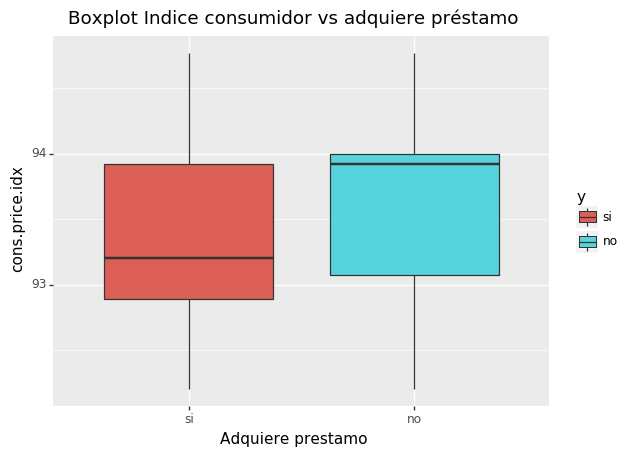

<ggplot: (-9223371899394848784)>

In [99]:
( ggplot(data_banco, aes('y', 'cons.price.idx'))
 + geom_boxplot(aes(fill = 'y' )) 
 + labs(title = "Boxplot Indice consumidor vs adquiere préstamo",
      x= "Adquiere prestamo") 
)

La distribución del índice cuando no se tiene el préstamo tiene una mediana mayor que cuando sí, sin embargo los cuartiles no muestran mayor diferencia.  

Podríamos ahora analizar otro índice más

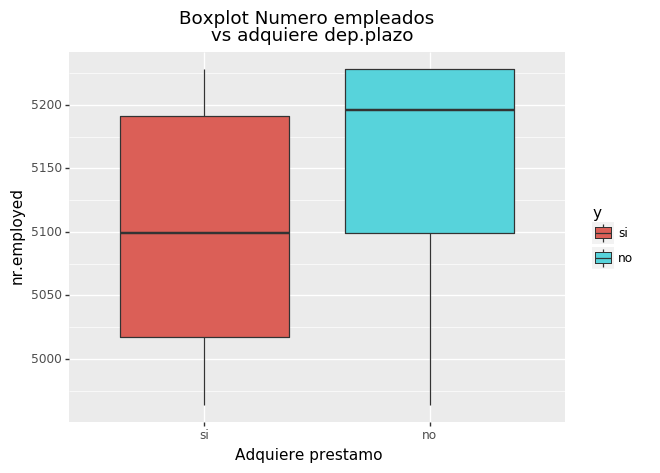

<ggplot: (-9223371899393239780)>

In [101]:
(ggplot(data_banco, aes('y', 'nr.employed'))
 + geom_boxplot(aes(fill = 'y')) 
 + labs(title = "Boxplot Numero empleados \n vs adquiere dep.plazo",
       x= "Adquiere prestamo")
)


Para todos los índices se muestra un comportamiento parecido al anterior, es decir, la distribución del índice cuando no se tiene el préstamo tiene una mediana mayor que cuando sí (excepto en índice de confianza), sin embargo los cuartiles no muestran mayor diferencia, en la variable que sí se ven diferencias es en el **número de empleados** donde la mediana para los que no adquieron el depósito a plazo es casi igual al cuartil 3 de los que sí lo cogen.



**¿La edad está relacionada con la aceptación o no del depósito a plazo?**

Así como en el caso anterior, empezaremos con una tabla de estadísticas descriptivas.

In [103]:
data_banco[['age', 'y']].groupby('y').describe()

age                                                    
      count       mean        std   min   25%   50%   75%   max
y                                                              
si   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0
no  36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0

Y ahora haremos un histograma, escogeremos 10 como el ancho del intervalo.

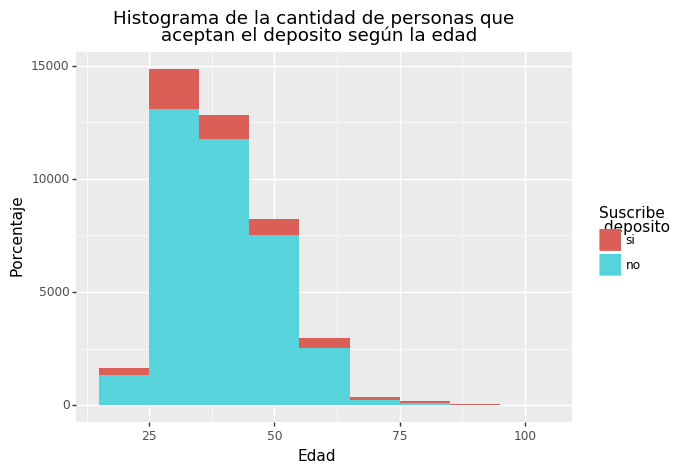

<ggplot: (-9223371899393243152)>

In [106]:
(ggplot(data_banco, aes('age'))
 + geom_histogram(aes(fill = 'y'), binwidth = 10) 
 + labs( x= 'Edad', y= 'Porcentaje', 
        title= 'Histograma de la cantidad de personas que \n aceptan el deposito según la edad',
        fill= 'Suscribe \n deposito')
)


**¿Afecta el trabajo a la aceptación de un depósito?**

Empezaremos con una tabla de estadísticas descriptivas, en este caso estamos hablando de dos variables cualitativas, por lo que empezaremos con una tabla de contingencia.

In [118]:
pd.crosstab(data_banco.job, 
            data_banco.y, 
            normalize=True,
            margins = False).round(4)*100


y,si,no
job,,
admin.,3.28,22.02
blue-collar,1.55,20.92
entrepreneur,0.30,3.23
housemaid,0.26,2.32
management,0.80,6.30
retired,1.05,3.12
self-employed,0.36,3.09
services,0.78,8.85
student,0.67,1.46


Pero veamos si los porcentajes de los que toman el depósito a plazo o no, varían según el trabajo


In [120]:
pd.crosstab(data_banco.job, 
            data_banco.y, 
            normalize='index',
            margins = False).round(4)*100


y,si,no
job,,
admin.,12.97,87.03
blue-collar,6.89,93.11
entrepreneur,8.52,91.48
housemaid,10.00,90.00
management,11.22,88.78
retired,25.23,74.77
self-employed,10.49,89.51
services,8.14,91.86
student,31.43,68.57


Y ahora un gráfico de barras:


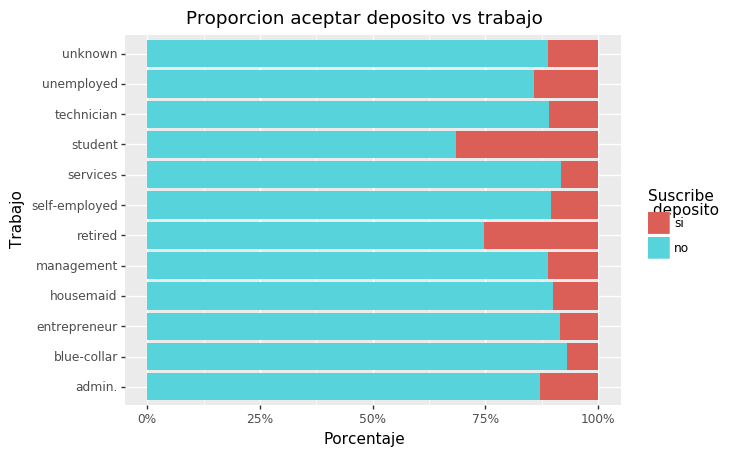

<ggplot: (-9223371899391629052)>

In [127]:
(ggplot(data_banco, aes('job'))
 + geom_bar(aes(fill = 'y'), position = 'fill') 
 + coord_flip()
 + labs( x= 'Trabajo', y= 'Porcentaje', title= 'Proporcion aceptar deposito vs trabajo', fill= 'Suscribe \n deposito')
 + scale_y_continuous(labels = percent_format())
)

Interesante ver que los estudiantes y los retirados son los que tienen más propensión a aceptar el depósito a plazo.


**Exploremos los días desde el último contacto**

Haremos un histograma de la variable días desde el último contacto:


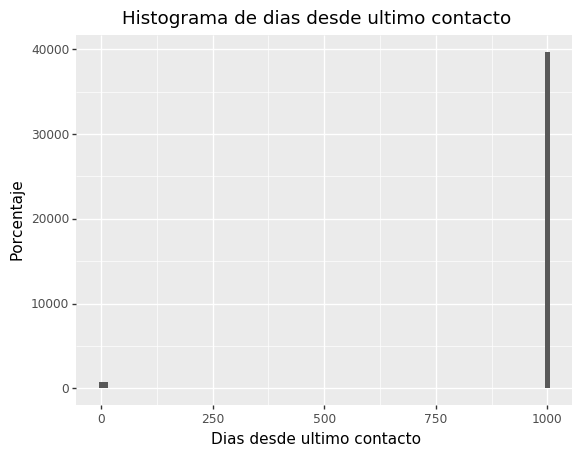

<ggplot: (-9223371899391226696)>

In [130]:
( ggplot(data_banco, aes('pdays')) 
 + geom_histogram( binwidth = 10)
 + labs( x= 'Dias desde ultimo contacto', y= 'Porcentaje', title= 'Histograma de dias desde ultimo contacto')
)

Como el "999" significaba "no contactado", se repite el histograma sin este valor


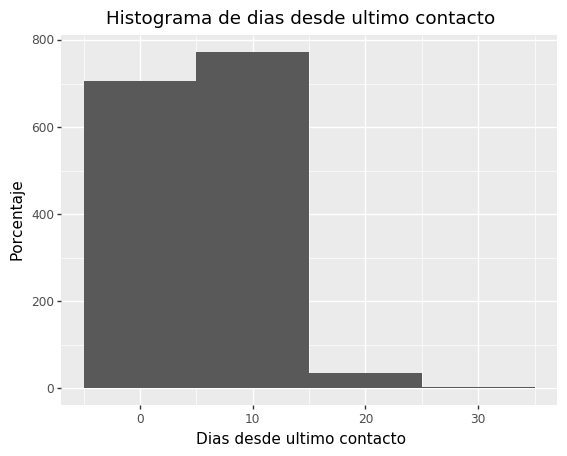

<ggplot: (-9223371899391084216)>

In [135]:
( ggplot(
    data_banco.loc[data_banco["pdays"] !=999], 
    aes('pdays')) 
 + geom_histogram( binwidth = 10)
 + labs( x= 'Dias desde ultimo contacto', y= 'Porcentaje', title= 'Histograma de dias desde ultimo contacto')
)

**pDays** como variable en un modelamiento no nos será útil, vamos a crear una nueva variable que indique si fue contactado o no.

In [138]:
# Crear Nueva columna pero asignarlo a otro DF
data_banco['pdays_binaria'] = np.where(data_banco.pdays==999, "No", "Si")

In [145]:
data_banco[['pdays_binaria', 'y']].groupby('pdays_binaria').size()

pdays_binaria
No    39673
Si     1515
dtype: int64

**A modo de ejemplo, exploremos la cantidad de llamadas y la tasa eurobor3m vs poseer casa y aceptar depósito**


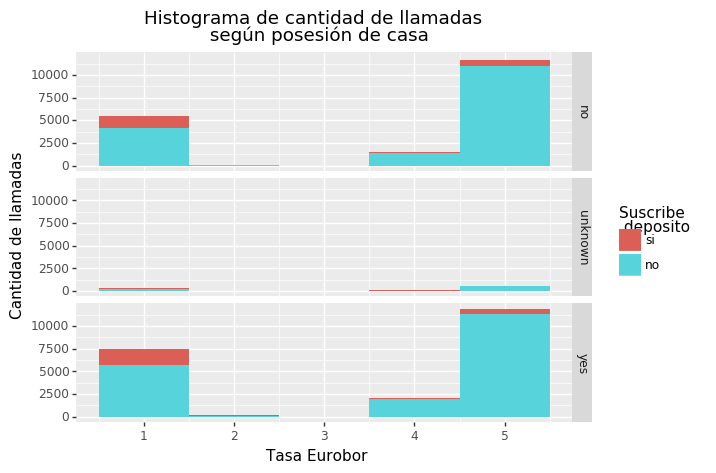

<ggplot: (-9223371899390487000)>

In [146]:
(ggplot(data_banco, aes('euribor3m')) 
 + geom_histogram(aes(fill = 'y'), binwidth = 1) 
 + facet_grid("housing~.") 
 + labs( x= 'Tasa Eurobor', y= 'Cantidad de llamadas', 
        title= 'Histograma de cantidad de llamadas \n según posesión de casa', 
        fill= 'Suscribe \n deposito')
)

Ahora en porcentaje


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\positions\position_stack.py:96: RuntimeWarning: invalid value encountered in true_divide
  heights = heights / np.abs(heights[-1])
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


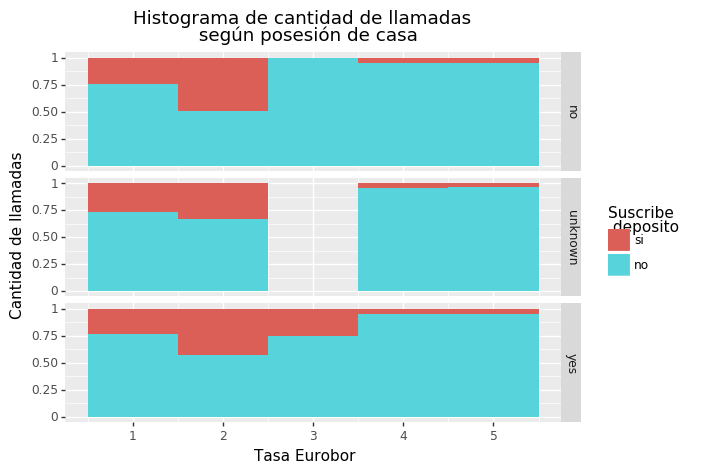

<ggplot: (-9223371899395862508)>

In [147]:
(ggplot(data_banco, aes('euribor3m')) 
 + geom_histogram(aes(fill = 'y'), binwidth = 1, position = 'fill') 
 + facet_grid("housing~.") 
 + labs( x= 'Tasa Eurobor', y= 'Cantidad de llamadas', 
        title= 'Histograma de cantidad de llamadas \n según posesión de casa', 
        fill= 'Suscribe \n deposito')
)

## Tú turno

**Ejercicio 1: Explorar el estado civil versus el aceptar o no un depósito**   

**Ejercicio 2: Asumamos que nos interesa analizar la duración de la llamada, explore la variable sola y en función de la edad**

